<a href="https://colab.research.google.com/github/dharnashukla94/car_price_prediction/blob/main/Car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import numpy as np 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# preperation
from sklearn.model_selection import train_test_split,KFold
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression,SelectFromModel
from sklearn.linear_model import Ridge


# models
import random
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostClassifier
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
# Evaluation 
import math
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
import pickle

random.seed(8)


In [3]:
# Loading the dataset into Pandas
    

path = '/content/drive/MyDrive/autos.csv'
data_df = pd.read_csv(path , encoding="ISO-8859-1")


#Pandas: whats the data row count?
data_df.shape
    
#Pandas: whats the distribution of the data?
data_df.describe()
    
#Pandas: What types of data do i have?
data_df.info()    
  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [4]:
data_df.head(20)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


In [5]:
#data_df['offerType'].unique()
#data_df['seller'].unique()
#data_df['gearbox'].unique()
#data_df['notRepairedDamage'].unique()
#data_df['abtest'].unique()
#data_df['vehicleType'].unique()
#data_df['model'].unique()

In [6]:
# Replacing German values to english

data_df['offerType'] = data_df['offerType'].replace(['Angebot', 'Gesuch'], ['offer','Application'])
data_df['seller'] = data_df['seller'].replace(['privat','gewerblich'],['private' ,'commercial'])
data_df['gearbox'] = data_df['gearbox'].replace(['manuell' ,'automatik'] , ['manual' ,'autombile'])
data_df['notRepairedDamage']  = data_df['notRepairedDamage'].replace(['ja' ,'nein'] , ['yes' ,'no'])
data_df['vehicleType'] = data_df['vehicleType'].replace(['kleinwagen' , 'kombi' ,'andere'] , 
                                                        ['small car' , 'combi', 'others'])

In [7]:
data_df['model'] = (data_df['model'].replace({'reihe':'range' , 'klasse':'class'}
                                             , regex=True))

In [8]:
# # Dropping unnessary columns

data_df = data_df.drop(['lastSeen'], axis= 1)
data_df = data_df.drop(['dateCrawled'], axis= 1)
data_df = data_df.drop(['dateCreated'], axis= 1)


In [9]:
# checking if there exists any NULL values in the train set

total = data_df.isnull().sum().sort_values(ascending=False)
percent = (data_df.isnull().sum()/data_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                     Total   Percent
notRepairedDamage    72060  0.193956
vehicleType          37869  0.101928
fuelType             33386  0.089861
model                20484  0.055134
gearbox              20209  0.054394
postalCode               0  0.000000
seller                   0  0.000000
offerType                0  0.000000
price                    0  0.000000
abtest                   0  0.000000
powerPS                  0  0.000000
yearOfRegistration       0  0.000000
nrOfPictures             0  0.000000
kilometer                0  0.000000
monthOfRegistration      0  0.000000
brand                    0  0.000000
name                     0  0.000000


In [10]:
data_df["gearbox"].value_counts()


manual       274214
autombile     77105
Name: gearbox, dtype: int64

In [11]:
data_df["brand"].isnull().sum()

0

In [12]:
data_df.groupby("brand")["gearbox"].value_counts()

brand       gearbox  
alfa_romeo  manual        2064
            autombile      146
audi        manual       20841
            autombile    10698
bmw         manual       25323
                         ...  
trabant     autombile        2
volkswagen  manual       64655
            autombile    10264
volvo       manual        2217
            autombile      991
Name: gearbox, Length: 80, dtype: int64

In [13]:
gearbox = data_df["gearbox"].unique()
brand = data_df["brand"].unique()
d = {}

for i in brand :
    m = 0
    for j in gearbox :
        if data_df[(data_df.gearbox == j) & (data_df.brand == i)].shape[0] > m :
            m = data_df[(data_df.gearbox == j) & (data_df.brand == i)].shape[0]
            d[i] = j

In [14]:
for i in brand :
    data_df.loc[(data_df.brand == i) & (data_df.gearbox.isnull()) ,"gearbox" ] = d[i]

In [15]:
# no nans in gearbox
data_df["gearbox"].isnull().sum()

0

In [16]:
data_df["notRepairedDamage"].value_counts()


no     263182
yes     36286
Name: notRepairedDamage, dtype: int64

In [17]:
data_df["notRepairedDamage"].isnull().sum()


72060

In [18]:
data_df["notRepairedDamage"].fillna("no",inplace = True)


In [19]:
data_df["notRepairedDamage"].isnull().sum()


0

In [20]:
data_df["fuelType"].value_counts()


benzin     223857
diesel     107746
lpg          5378
cng           571
hybrid        278
andere        208
elektro       104
Name: fuelType, dtype: int64

In [21]:
data_df["fuelType"].fillna("benzin",inplace = True)


In [22]:
data_df.isnull().sum()


name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                    0
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType                   0
brand                      0
notRepairedDamage          0
nrOfPictures               0
postalCode                 0
dtype: int64

In [23]:
data_df["vehicleType"].value_counts()


limousine    95894
small car    80023
combi        67564
bus          30201
cabrio       22898
coupe        19015
suv          14707
others        3357
Name: vehicleType, dtype: int64

In [24]:
data_df.groupby("fuelType")["vehicleType"].value_counts()


fuelType  vehicleType
andere    limousine         51
          others            44
          small car         29
          combi             25
          bus               10
          suv                9
          cabrio             6
          coupe              3
benzin    small car      72531
          limousine      66300
          combi          31350
          cabrio         20769
          coupe          15935
          bus            10795
          suv             5400
          others          1786
cng       bus              240
          combi            136
          small car         80
          limousine         40
          others            14
          suv                4
          cabrio             3
          coupe              3
diesel    combi          34848
          limousine      27648
          bus            18622
          suv             8665
          small car       6808
          coupe           2737
          cabrio          1871
          others 

In [25]:
vehicleType = data_df["vehicleType"].unique()
fuelType = data_df["fuelType"].unique()
print(fuelType)
print(vehicleType)
#remove nan 
vehicleType = np.delete(vehicleType,0)

['benzin' 'diesel' 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
[nan 'coupe' 'suv' 'small car' 'limousine' 'cabrio' 'bus' 'combi' 'others']


In [26]:
d = {}
for i in fuelType :
    m = 0
    for j in vehicleType :
        if data_df[(data_df.vehicleType == j) & (data_df.fuelType == i)].shape[0] > m :
            m = data_df[(data_df.vehicleType == j) & (data_df.fuelType == i)].shape[0]
            d[i] = j

In [27]:
for i in fuelType :
    data_df.loc[(data_df.fuelType == i) & (data_df.vehicleType.isnull()) ,"vehicleType" ] = d[i]

In [28]:
data_df["vehicleType"].isnull().sum()


0

In [29]:
len(data_df["model"].unique())


252

In [30]:
data_df["model"].unique()[0]


'golf'

In [31]:
data_df["model"].fillna("golf",inplace =True)


In [32]:
data_df.isnull().sum()


name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
nrOfPictures           0
postalCode             0
dtype: int64

In [33]:
data_df.head()


,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,nrOfPictures,postalCode
0,Golf_3_1.6,private,offer,480,test,small car,1993,manual,0,golf,150000,0,benzin,volkswagen,no,0,70435
1,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manual,190,golf,125000,5,diesel,audi,yes,0,66954
2,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,2004,autombile,163,grand,125000,8,diesel,jeep,no,0,90480
3,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small car,2001,manual,75,golf,150000,6,benzin,volkswagen,no,0,91074
4,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small car,2008,manual,69,fabia,90000,7,diesel,skoda,no,0,60437


In [34]:
from sklearn.preprocessing import LabelEncoder


In [35]:
data = data_df.copy()

In [36]:
data["vehicleType"] =LabelEncoder().fit_transform(data["vehicleType"])
data["fuelType"] =LabelEncoder().fit_transform(data["fuelType"])
data["gearbox"] =LabelEncoder().fit_transform(data["gearbox"])
data["notRepairedDamage"] =LabelEncoder().fit_transform(data["notRepairedDamage"])
data["brand"] =LabelEncoder().fit_transform(data["brand"])
data["model"] =LabelEncoder().fit_transform(data["model"])
data["abtest"] =LabelEncoder().fit_transform(data["abtest"])
data["vehicleType"] =LabelEncoder().fit_transform(data["vehicleType"])
data["fuelType"] =LabelEncoder().fit_transform(data["fuelType"])
data["gearbox"] =LabelEncoder().fit_transform(data["gearbox"])
data["notRepairedDamage"] =LabelEncoder().fit_transform(data["notRepairedDamage"])
data["brand"] =LabelEncoder().fit_transform(data["brand"])
data["model"] =LabelEncoder().fit_transform(data["model"])
data["abtest"] =LabelEncoder().fit_transform(data["abtest"])
data['postalCode']=LabelEncoder().fit_transform(data['postalCode'])
data['seller']=LabelEncoder().fit_transform(data['seller'])
data['nrOfPictures']=LabelEncoder().fit_transform(data['nrOfPictures'])
data['monthOfRegistration']=LabelEncoder().fit_transform(data['monthOfRegistration'])
data['offerType']=LabelEncoder().fit_transform(data['offerType'])
data['name']=LabelEncoder().fit_transform(data['name'])
data["price"] = LabelEncoder().fit_transform(data['price'])

In [37]:
# analysis year o registration
data["yearOfRegistration"].describe()

count    371528.000000
mean       2004.577997
std          92.866598
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: yearOfRegistration, dtype: float64

In [38]:
data[data.yearOfRegistration > 2017].shape

(4134, 17)

In [39]:
data[data.yearOfRegistration < 1950].shape

(289, 17)

In [40]:
data = data[(data.yearOfRegistration < 2017)  & (data.yearOfRegistration > 1950)]


In [41]:
data["price"].describe()


count    356537.000000
mean       1470.343372
std        1141.821443
min           0.000000
25%         550.000000
50%        1178.000000
75%        2174.000000
max        5596.000000
Name: price, dtype: float64

In [42]:
data[data.price < 100].shape


(15770, 17)

In [43]:
data[data.price > 200000].shape


(0, 17)

In [44]:
data = data[(data.price > 100) & (data.price < 200000) ]


Text(0.5, 1.0, 'pearson correlation')

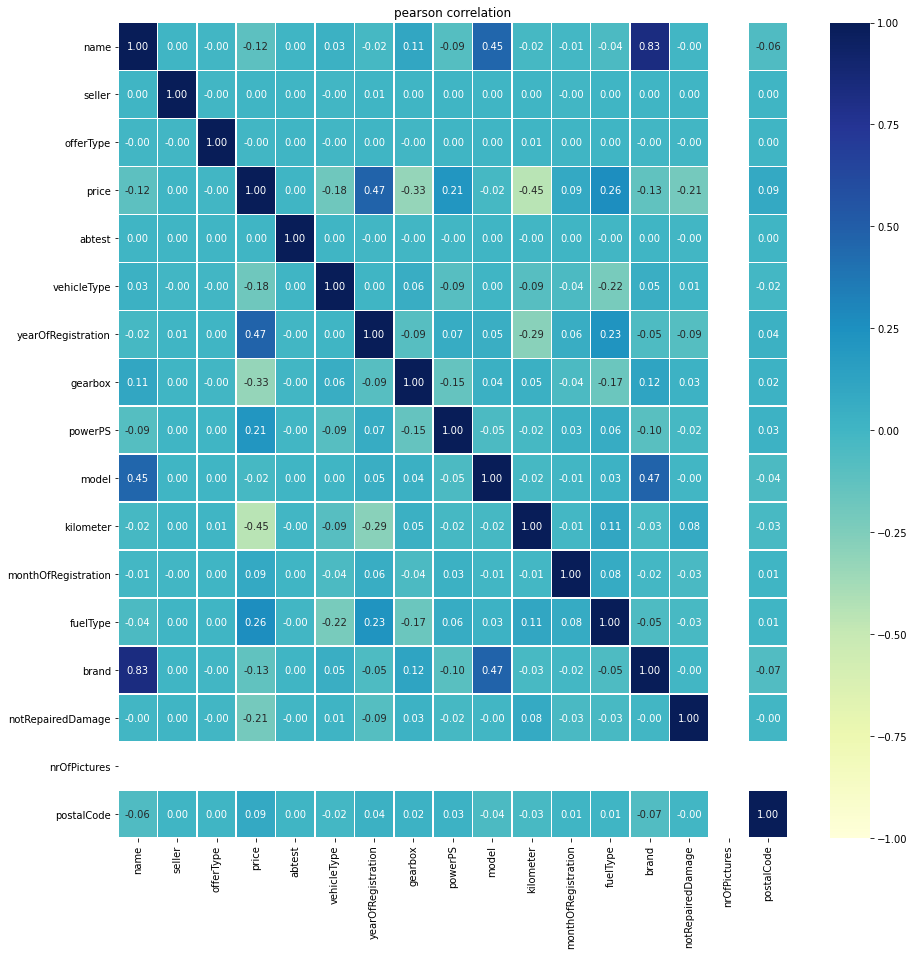

In [45]:
corr_matrix = data.corr(method="pearson")
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


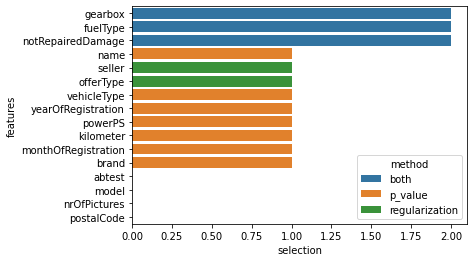

In [46]:
X = data.drop("price", axis=1).values
y = data["price"].values
feature_names = data.drop("price", axis=1).columns
## p-value
selector = SelectKBest(f_regression, k=10).fit(X,y)
pvalue_selected_features = feature_names[selector.get_support()]

## regularization
selector = SelectFromModel(estimator = Ridge(alpha=1.0, fit_intercept=True), 
                                 max_features=10).fit(X,y)
regularization_selected_features = feature_names[selector.get_support()]
 
## plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["p_value"] = dtf_features["features"].apply(lambda x: "p_value" if x in pvalue_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in pvalue_selected_features else 0)
dtf_features["regularization"] = dtf_features["features"].apply(lambda x: "regularization" if x in regularization_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in regularization_selected_features else 0)
dtf_features["method"] = dtf_features[["p_value","regularization"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
dtf_features["method"] = dtf_features["method"].apply(lambda x: "both" if len(x.split()) == 2 else x)
sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False), dodge=False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


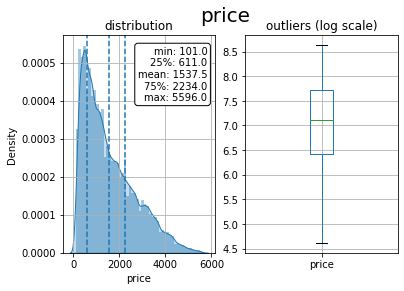

In [47]:
x_ = "price"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x_, fontsize=20)
### distribution
ax[0].title.set_text('distribution')
variable = data[x_].fillna(data[x_].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = data[x_].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(data[x_])
tmp_dtf[x_] = np.log(tmp_dtf[x_])
tmp_dtf.boxplot(column=x_, ax=ax[1])
plt.show()

In [120]:
x_cols = ['gearbox', 'fuelType', 'notRepairedDamage']

y  = data["price"]
x =  data[x_cols]

In [49]:
# scaling the data
from sklearn.preprocessing import StandardScaler

data_scale = x
data_scale['price'] = y
scaler = StandardScaler()
data_scale = scaler.fit_transform(data_scale)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [50]:
data_scale = pd.DataFrame(data_scale, columns = x.columns)

In [51]:
data_scale

,gearbox,fuelType,notRepairedDamage,price
0,0.532785,-0.645707,-0.318654,-1.140708
1,0.532785,1.234059,3.138196,1.824331
2,-1.876929,1.234059,-0.318654,0.936866
3,0.532785,-0.645707,-0.318654,-0.749048
4,0.532785,1.234059,-0.318654,-0.182033
...,...,...,...,...
340761,0.532785,-0.645707,-0.318654,-0.546988
340762,-1.876929,-0.645707,-0.318654,-0.862986
340763,0.532785,1.234059,-0.318654,0.849633
340764,0.532785,1.234059,-0.318654,-0.234551


In [123]:
# saving scaled data for input

# scale_data = x
# scaler = StandardScaler()
# scale_data = scaler.fit_transform(scale_data)

# # # saving 

# output = open('scale_data.pkl', 'wb')
# pickle.dump(scaler, output)
# output.close()

# #Loading 
# file = open('scale_data.pkl', 'rb')
# l2 = pickle.load(file)
# file.close()
# scaleing_data= l2.transform(scaleing_data)


# scaling data for output

# Y = data["price"]
# Y = Y.values.reshape(-1,1)
# scaler = StandardScaler()
# Y = scaler.fit_transform(Y)


# output1 = open('scale_data_y.pkl', 'wb')
# pickle.dump(scaler, output1)
# output1.close()


In [99]:
#data1 = data_df.copy()


In [115]:
#saving encoder and scaling for further use

# l1 = LabelEncoder()    
# data1['gearbox'] = l1.fit_transform(data1['gearbox'])
# out1 = open('gearbox_encoder.pkl', 'wb')
# pickle.dump(l1, out1)
# out1.close()

# l2 = LabelEncoder()    
# data1['fuelType'] = l2.fit_transform(data1['fuelType'])
# out2 = open('fuelType_encoder.pkl', 'wb')
# pickle.dump(l2, out2)
# out3.close()

# l3 = LabelEncoder()    
# data1['notRepairedDamage'] = l3.fit_transform(data1['notRepairedDamage'])
# out3 = open('notRepairedDamage_encoder.pkl', 'wb')
# pickle.dump(l3, out3)
# out3.close()

# Unloading Encoder

# pkl_file2 = open('models/gearbox_encoder.pkl', 'rb')
# l2 = pickle.load(pkl_file2)
# pkl_file2.close()
# gearbox = l2.transform(gearbox)

# print(data1['fuelType'])
# pkl_file1 = open('fuelType_encoder.pkl', 'rb')
# l1 = pickle.load(pkl_file1)
# pkl_file1.close()
# fuelType = l1.transform(data1['fuelType'])
# print(fuelType)

# pkl_file3 = open('notRepairedDamage_encoder.pkl', 'rb')
# l3 = pickle.load(pkl_file3)
# pkl_file3.close()
# notRepairedDamage= l3.transform(data1['notRepairedDamage'])





/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


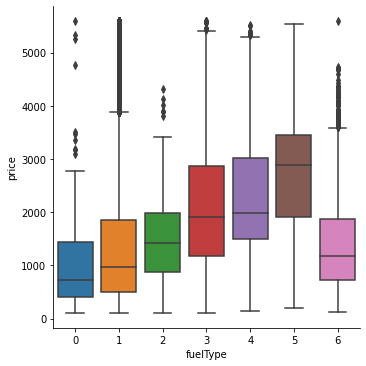

In [ ]:
Checking of outliers in FuelType 
cat, num = "fuelType", "price"
ax[0].title.set_text('outliers')
sns.catplot(x=cat, y=num, data=data, kind="box", ax=ax[0])
ax[0].grid(True)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


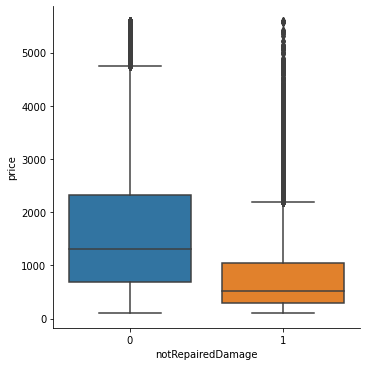

In [ ]:
# Checking of outliers in notRepairedDamage 
cat, num = "notRepairedDamage", "price"
ax[0].title.set_text('outliers')
sns.catplot(x=cat, y=num, data=data, kind="box", ax=ax[0])
ax[0].grid(True)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


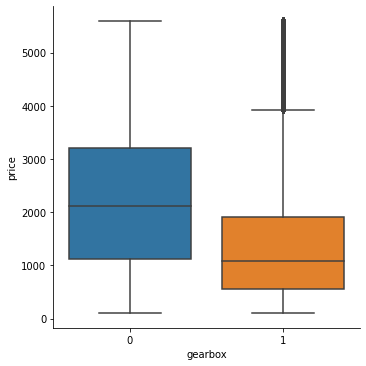

In [ ]:
# Checking of outliers in gearbox 
cat, num = "gearbox", "price"
ax[0].title.set_text('outliers')
sns.catplot(x=cat, y=num, data=data, kind="box", ax=ax[0])
ax[0].grid(True)
plt.show()

In [ ]:
y_new  = data_scale["price"]
x_new =  data_scale[x_cols]

In [ ]:
# checking skew of the function

print(x_new['notRepairedDamage'].skew())
x_new['notRepairedDamage'].describe()

print(x_new['gearbox'].skew())
x_new['gearbox'].describe()

print(x_new['fuelType'].skew())
x_new['fuelType'].describe()

print(y_new.skew())
y_new.describe()

2.8195540716372136
-1.344149589563439
1.404113032007072
0.929369934618894


count    3.407660e+05
mean     5.651716e-16
std      1.000001e+00
min     -1.278678e+00
25%     -8.247098e-01
50%     -2.674856e-01
75%      6.199785e-01
max      3.612611e+00
Name: price, dtype: float64

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, random_state = 0)

In [ ]:
import sklearn.metrics as metrics
def regression_results(y_test, y_pred):

    # Regression metrics

    mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
    mse=metrics.mean_squared_error(y_test, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
    
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

MAE:  0.7179
MSE:  0.8079
RMSE:  0.8988


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


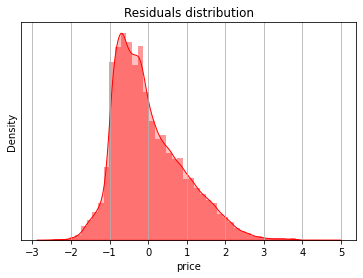

In [ ]:
# LinearRegressor
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)

regression_results(y_test,y_pred)
## residuals
residuals = y_test - y_pred
fig, ax = plt.subplots()
sns.distplot(residuals, color="red", hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
ax.grid(True)
ax.set(yticks=[], yticklabels=[], title="Residuals distribution")
plt.show()



MAE:  0.7882
MSE:  1.1001
RMSE:  1.0488


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


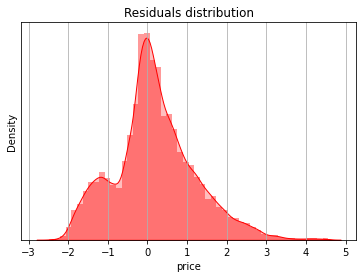

In [ ]:
# KnnRegressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
regression_results(y_test,y_pred)

## residuals
residuals = y_test - y_pred
fig, ax = plt.subplots()
sns.distplot(residuals, color="red", hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
ax.grid(True)
ax.set(yticks=[], yticklabels=[], title="Residuals distribution")
plt.show()

MAE:  0.7029
MSE:  0.781
RMSE:  0.8838


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


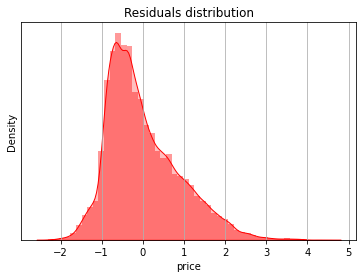

In [ ]:
# Random forest Regressor
random = RandomForestRegressor()
random.fit(x_train, y_train)
y_pred = random.predict(x_test)
regression_results(y_test,y_pred)

## residuals
residuals = y_test - y_pred
fig, ax = plt.subplots()
sns.distplot(residuals, color="red", hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
ax.grid(True)
ax.set(yticks=[], yticklabels=[], title="Residuals distribution")
plt.show()

MAE:  0.7029
MSE:  0.781
RMSE:  0.8837


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


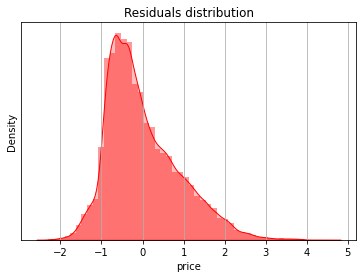

In [ ]:
# Gradient Boosting Regressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
regression_results(y_test,y_pred)

## residuals
residuals = y_test - y_pred
fig, ax = plt.subplots()
sns.distplot(residuals, color="red", hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
ax.grid(True)
ax.set(yticks=[], yticklabels=[], title="Residuals distribution")
plt.show()


In [ ]:
# saving the model

import pickle

# save the model to disk
filename = "final_model.pkl"  

with open(filename, 'wb') as file:  
    pickle.dump(reg, file)
 
 
# load the model from disk
#with open(filename, 'rb') as file:  
#    model = pickle.load(file)

MAE:  0.7029
MSE:  0.781
RMSE:  0.8837


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


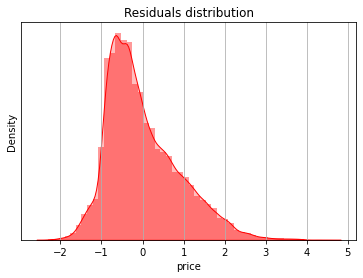

In [ ]:
# XGboost Regressor
xgb = XGBRegressor(objective='reg:squarederror')
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
regression_results(y_test,y_pred)


## residuals
residuals = y_test - y_pred
fig, ax = plt.subplots()
sns.distplot(residuals, color="red", hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
ax.grid(True)
ax.set(yticks=[], yticklabels=[], title="Residuals distribution")
plt.show()

MAE:  0.7063
MSE:  0.7817
RMSE:  0.8841


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


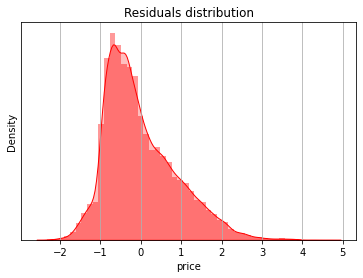

In [ ]:
# Multilayer perceptron 
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=100).fit(x_train, y_train)
y_pred = regr.predict(x_test)
regression_results(y_test,y_pred)

## residuals
residuals = y_test - y_pred
fig, ax = plt.subplots()
sns.distplot(residuals, color="red", hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
ax.grid(True)
ax.set(yticks=[], yticklabels=[], title="Residuals distribution")
plt.show()